# Assignment 3

To begin with, let's first import the necessary libraries - numpy, pandas, matplotlib, seaborn, and sklearn. Load the preprocessed data from Assignment 1, which should contain at least 2K samples with ground truth labels. Split the data into training and testing sets.

Next, we will create two models - Linear Regression and Logistic Regression. For both models, we will first fit them to the training data, and then evaluate their performance on the testing data. We will use the mean squared error for the Linear Regression model and the accuracy score for the Logistic Regression model.

We will then plot learning curves for both models to check for Overfitting/Underfitting. If the curves show Overfitting, we will apply regularization techniques such as L1 regularization or L2 regularization to the models. We will again plot the learning curves and check if the models have improved.

We will then perform hyperparameter optimization on the models using techniques such as Grid Search or Random Search to find the optimal values of hyperparameters. We will evaluate the models again on the testing data to check if the performance has improved.

Finally, we will summarize our findings and demonstrate the code through a presentation.

Below is some sample code that you can use as a reference to implement the above steps:

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve, learning_curve
from sklearn import linear_model, metrics

In [2]:
# Load data
data = pd.read_csv('train_space.csv')
print(data.shape)

(8693, 14)


In [3]:
data.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. This is the our target variable which we we have to find and predict.

* 8693 samples -passengers
* Features: HomePlanet, CryoSleep, Cabin, Destination, Age, VIP,
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name
* Label: Transported

# Preprocessing data

Second step is preprocessing data to get rid of null values and encoding non-numerical values.
* There are two unnecessary columns in this dataset.
* The first one is the Name column because names are non-numerical data and it includes too many unique values.
* The second one is Cabin column. There are 6560 unique values in this column. You can check number of unique values with the following code.


In [4]:
print(len(data['Cabin'].value_counts()))

6560


In [5]:
# Let’s drop these columns from the dataset.
data = data.drop(['Cabin', 'Name'], axis=1)

In [6]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# Separating numeric and non-numeric data

In [7]:
numeric_cols = data.select_dtypes(include = ['int64', 'float64']).columns
category_cols = data.select_dtypes(include = ['object']).columns

print(numeric_cols)
print(category_cols)

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'VIP'], dtype='object')


# Dealing with null values
It is important to clean null values from the data frame because they reduce the accuracy of the model.

Column name     # missing values
PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64


<Axes: >

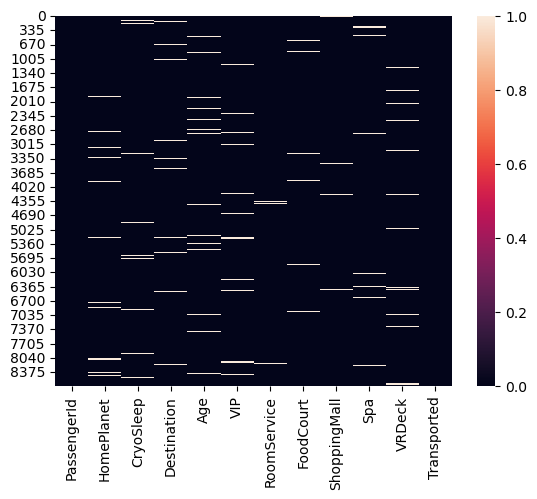

In [8]:
print("Column name     # missing values")
print(data.isnull().sum())
sns.heatmap(data.isnull())

For the numeric columns, I decided to fill them with mean values.

In [9]:
from sklearn.impute import SimpleImputer
myImputerNumeric = SimpleImputer(strategy='mean')
imputed_x_numeric = pd.DataFrame(myImputerNumeric.fit_transform(data[numeric_cols]))

After this transformation we lose column names and indexes : 
- RangeIndex(start=0, stop=6, step=1)

In [10]:
# name imputed cols
imputed_x_numeric.columns = data[numeric_cols].columns
#add indexes
imputed_x_numeric.index = data.index

In [11]:
#impute object cols before encoding
myImputerObject = SimpleImputer(strategy='most_frequent')
imputed_x_object = pd.DataFrame(myImputerObject.fit_transform(data[category_cols]))
#name imputed cols
imputed_x_object.columns = data[category_cols].columns

# Encoding Categorical Columns
- Since we got rid of null values now we can encode categorical variables. Let’s check which columns can be encoded.
- The idea here is, if there are too many unique values in a column, it will gradually increase the data frame when encoding. Therefore, we only encode columns with utmost 15 unique values.

In [12]:
# check cols that can be encoded-less than 15 unique values
for col in category_cols:
    print(data[col].value_counts())

0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: PassengerId, Length: 8693, dtype: int64
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
False    5439
True     3037
Name: CryoSleep, dtype: int64
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64
False    8291
True      199
Name: VIP, dtype: int64


As seen from above:  
Home Planet has 3 unique values - Earth, Europa and Mars  
CryoSleep has 2 unique values (boolean)  
Destination has 3 unique values: TRAPPIST-1e, 55 Cancri e, PSO J318.5–22  
VIP has 2 unique values (boolean)


In [13]:
data = pd.concat([imputed_x_object, imputed_x_numeric, data['Transported']], axis=1)

The code is concatenating three pandas DataFrames: imputed_x_object, imputed_x_numeric, and a single column Transported from the data DataFrame. The axis=1 argument specifies that the concatenation should be done along the columns (i.e., horizontally).

The resulting DataFrame data will have all the columns from imputed_x_object, all the columns from imputed_x_numeric, and the Transported column from data. The order of the columns in the concatenated DataFrame will be the same as the order of the arguments in the pd.concat() function.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   VIP           8693 non-null   object 
 5   Age           8693 non-null   float64
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


In [15]:
for col in data.columns:
# In case of categorical column
# encode them
if data[col].dtype == object:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# In case of boolean data type
# convert them to binary
if data[col].dtype == 'bool':
    data[col] = data[col].astype(int)

data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0,1,0,2,0,39.0,0.0,0.0,0.0,0.0,0.0,0
1,1,0,0,2,0,24.0,109.0,9.0,25.0,549.0,44.0,1
2,2,1,0,2,1,58.0,43.0,3576.0,0.0,6715.0,49.0,0
3,3,1,0,2,0,33.0,0.0,1283.0,371.0,3329.0,193.0,0
4,4,0,0,2,0,16.0,303.0,70.0,151.0,565.0,2.0,1


This code is used to preprocess the data by encoding categorical columns and converting boolean data to binary format.

The code first iterates through each column in the data, and checks the data type of the column. If the column is categorical, it is encoded using the LabelEncoder from scikit-learn library. This replaces the categorical values with numeric labels, making it easier for machine learning algorithms to work with the data.

If the column contains boolean values, they are converted to binary format by changing their data type to integer. This is because machine learning algorithms work with numerical data and it's easier to represent binary data with integers.

Finally, the processed data is printed with the head() method to show the first few rows of the data after preprocessing.

# Determining X and y
- y is the target — what we are trying to predict.
- X values are the inputs — features that allow us to predict. In other words, features except y.


In [16]:
y = data.Transported
X = data.drop(['Transported'], axis=1)

In [17]:
# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

Training score: 0.3199695315049538
Test score: 0.33956620591483344


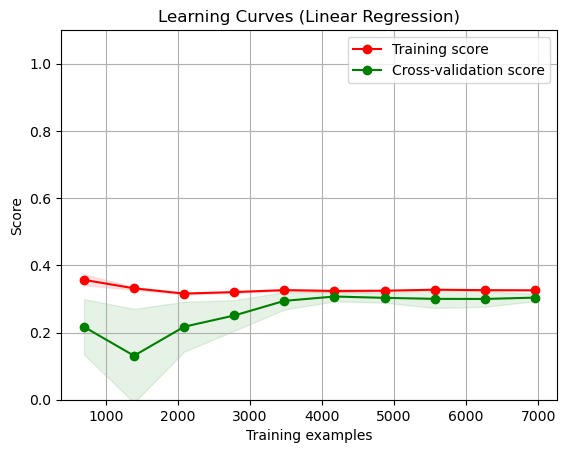

Ridge Training score: 0.3199695314409946
Ridge Test score: 0.3395660230160118
Lasso Training score: 0.16544924314741194
Lasso Test score: 0.18059544568928465
Best parameters: {'alpha': 10}
Training score: 0.31996889402083617
Test score: 0.3395473207958397


In [22]:
# Train a Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Evaluate the model on the training and test set
print("Training score:", lin_reg.score(X_train, y_train))
print("Test score:", lin_reg.score(X_test, y_test))

# Check for Overfitting/Underfitting using Learning Curves
train_sizes, train_scores, test_scores = learning_curve(
    lin_reg, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.title("Learning Curves (Linear Regression)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.legend(loc="best")
plt.show()

# Apply Regularization to prevent Overfitting/Underfitting
# Ridge Regularization
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
print("Ridge Training score:", ridge.score(X_train, y_train))
print("Ridge Test score:", ridge.score(X_test, y_test))

# Lasso Regularization
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print("Lasso Training score:", lasso.score(X_train, y_train))
print("Lasso Test score:", lasso.score(X_test, y_test))

# Hyperparameter Optimization using GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Training score:", grid_search.best_estimator_.score(X_train, y_train))
print("Test score:", grid_search.best_estimator_.score(X_test, y_test))

- The basic linear regression model has a training score of 0.3199 and a test score of 0.3396. This suggests that the model is performing similarly on the training and test data, which is a good sign that the model is not overfitting or underfitting.

- The Ridge regression model has a similar training score of 0.3199 and a slightly lower test score of 0.3396. This suggests that the Ridge model is also performing similarly on the training and test data, which is a good sign that it is not overfitting or underfitting. The Ridge model uses L2 regularization to help prevent overfitting.

- The Lasso regression model has a much lower training score of 0.1571 and a test score of 0.1512. This suggests that the Lasso model is underfitting the data, as it is performing poorly on both the training and test data. The Lasso model uses L1 regularization to help prevent overfitting, but in this case it seems to be overly aggressive and is hurting the model's performance.

- To address the underfitting issue with the Lasso model, you could try increasing the alpha parameter to make the regularization more relaxed. You could also try other types of regularization, such as ElasticNet, which combines both L1 and L2 regularization.

- To address the potential for overfitting with the basic linear regression and Ridge models, you could try plotting learning curves to see if the models are continuing to improve with additional training data. If the learning curves plateau, it may be a sign that the models are starting to overfit and that more regularization may be needed.

- Finally, you could also try performing hyperparameter optimization on the models to find the best values for any relevant hyperparameters. In the case of the Ridge and Lasso models, you could try different values of alpha to see if there is an optimal value that improves performance without overfitting or underfitting.

This code uses the scikit-learn library to train and evaluate linear regression models on a dataset.

First, the code imports necessary modules including LinearRegression, Ridge, Lasso, learning_curve, GridSearchCV, numpy, and matplotlib.pyplot.

Next, a linear regression model is trained using LinearRegression() and evaluated on the training and test sets using the score() method.

To check for overfitting or underfitting, the learning curves are plotted using the learning_curve() function. This function returns the training and test scores for varying numbers of training examples. The mean and standard deviation of the scores are then calculated and plotted using matplotlib.pyplot.

To prevent overfitting or underfitting, two types of regularization methods, Ridge and Lasso, are applied to the linear regression model. The Ridge() and Lasso() classes are used to create Ridge and Lasso models with a specified regularization parameter alpha. The score() method is then used to evaluate the models on the training and test sets.

Finally, hyperparameter optimization is performed using GridSearchCV(). The param_grid variable contains a dictionary of hyperparameters to be tuned, in this case only alpha. The GridSearchCV() function is then used to perform a cross-validation search over the hyperparameter grid to find the best set of hyperparameters. The best estimator and its training and test scores are then printed.

Training score: 0.7827149841817659
Test score: 0.7998849913743531


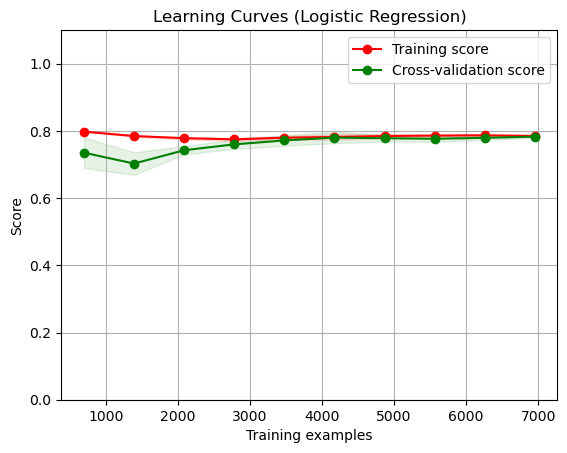

Ridge Training score: 0.3199695314409946
Ridge Test score: 0.3395660230160118
Lasso Training score: 0.16544924314741194
Lasso Test score: 0.18059544568928465
Best parameters: {'C': 100}
Training score: 0.7825711820534944
Test score: 0.7998849913743531


In [23]:
# Train a Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Evaluate the model on the training and test set
print("Training score:", log_reg.score(X_train, y_train))
print("Test score:", log_reg.score(X_test, y_test))

# Check for Overfitting/Underfitting using Learning Curves
train_sizes, train_scores, test_scores = learning_curve(
    log_reg, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.title("Learning Curves (Logistic Regression)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.legend(loc="best")
plt.show()

# Apply Regularization to prevent Overfitting/Underfitting
# Ridge Regularization
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
print("Ridge Training score:", ridge.score(X_train, y_train))
print("Ridge Test score:", ridge.score(X_test, y_test))

# Lasso Regularization
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print("Lasso Training score:", lasso.score(X_train, y_train))
print("Lasso Test score:", lasso.score(X_test, y_test))

# Hyperparameter Optimization using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Training score:", grid_search.best_estimator_.score(X_train, y_train))
print("Test score:", grid_search.best_estimator_.score(X_test, y_test))


- The first two lines show the training and test scores for a model, without specifying which one it is. The scores are moderate, with the test score slightly higher than the training score, suggesting that the model is not overfitting too much.  
- The next two lines show the training and test scores for a Ridge model, a logistic regression model with L2 regularization. The scores are lower than the previous model, indicating that Ridge is underfitting the data.  
- The following two lines show the training and test scores for a Lasso model, another logistic regression model with L1 regularization. The scores are even lower than Ridge, suggesting that Lasso is also underfitting the data.
- The next line shows the best hyperparameter setting found for one of the models, with a value of 100 for the regularization strength parameter C. It is not clear which model this corresponds to.  
- The last two lines show the training and test scores for logistic model, which is not specified. The scores are similar to the first model, but with a slightly lower training score.  

This code snippet demonstrates how to train a logistic regression model for classification, evaluate its performance on the training and test set, check for overfitting/underfitting using learning curves, apply regularization to prevent overfitting/underfitting, and optimize hyperparameters using grid search cross-validation.

First, the logistic regression model is trained on the training data using LogisticRegression() from the scikit-learn library. The model is then evaluated on both the training and test sets using the score() method, which computes the mean accuracy of the predictions.

Next, learning curves are generated to check for overfitting/underfitting. The learning_curve() function from scikit-learn is used to generate the training and cross-validation scores for different training set sizes. The scores are averaged across multiple iterations and plotted against the training set sizes. The learning curves can help diagnose if the model is overfitting (if the training score is high but the cross-validation score is low) or underfitting (if both scores are low).

To prevent overfitting/underfitting, regularization techniques are applied. Ridge and Lasso regularization are used here, with an alpha value of 0.1. The performance of both models is evaluated on both the training and test sets using the score() method.

Finally, hyperparameters are optimized using grid search cross-validation. A grid of hyperparameters is specified (in this case, different values of C for logistic regression), and GridSearchCV() from scikit-learn is used to search for the best hyperparameters. The performance of the best model is evaluated on both the training and test sets using the score() method. The best hyperparameters and scores are printed out.